# Exercise 1. Predict delivery time using sorting time

In [17]:
import pandas as pd
import numpy as np
df_deltime=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 4 Simple Linear Regression/delivery_time.csv')
df_deltime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [18]:
df_deltime.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [19]:
df_deltime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [20]:
df_deltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
#no missing data

In [21]:
df_deltime[df_deltime.duplicated()]

,Delivery Time,Sorting Time


In [ ]:
#no duplicated data

<AxesSubplot:>

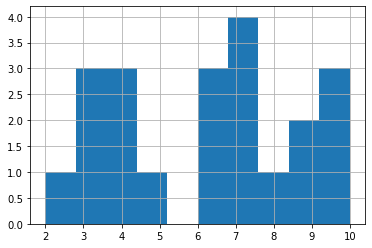

In [22]:
df_deltime['Sorting Time'].hist()

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time'>

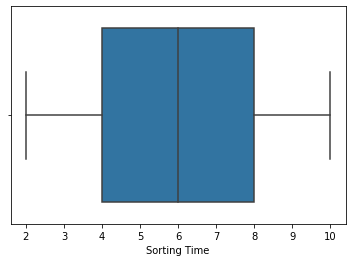

In [23]:
import seaborn as sns
sns.boxplot(df_deltime['Sorting Time'])

In [24]:
#normally distributed data; no outliers

In [29]:
df_deltime=df_deltime.rename({'Sorting Time': 'ST'}, axis=1)
df_deltime=df_deltime.rename({'Delivery Time': 'DT'}, axis=1)
df_deltime

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [30]:
import statsmodels.formula.api as smf
model=smf.ols('ST~DT',data=df_deltime).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

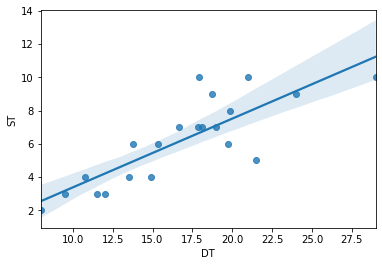

In [31]:
sns.regplot(x='DT',y='ST', data=df_deltime)

In [32]:
#model parameters
model.params

Intercept   -0.756673
DT           0.413744
dtype: float64

In [33]:
df_deltime.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [34]:
#rsquared
model.rsquared

0.682271474841723

In [ ]:
#not sufficient data available for developing model

In [35]:
#pvalue
model.pvalues

Intercept    0.512611
DT           0.000004
dtype: float64

In [36]:
#as the pvalue<0.05, delivery time data is significant enough to use to predict sorting time values

In [42]:
#to predict sorting time for new delivery times of 15 mins and 30 mins
df_pred=pd.DataFrame(pd.Series([15,30]),columns=['DT'])

In [41]:
model.predict(df_pred)

0     5.449481
1    11.655635
2     5.863225
dtype: float64

# Exercise 2 Prediction model for salary hike

In [43]:
df_salary=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 4 Simple Linear Regression/Salary_Data.csv')
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [45]:
df_salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [47]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [48]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [49]:
#no missing data

In [50]:
df_salary[df_salary.duplicated()]

,YearsExperience,Salary


In [51]:
#no duplicate values

<AxesSubplot:>

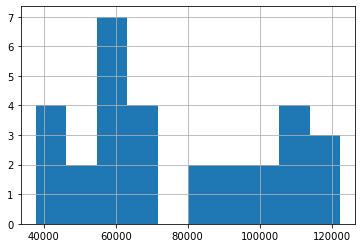

In [54]:
df_salary['Salary'].hist()

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

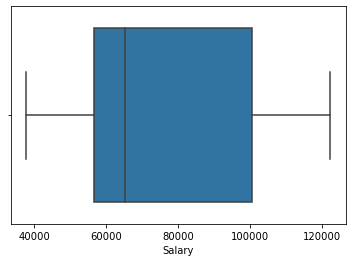

In [55]:
sns.boxplot(df_salary['Salary'])

In [56]:
#positive skewed data

In [57]:
model_salary=smf.ols('Salary~YearsExperience',data=df_salary).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

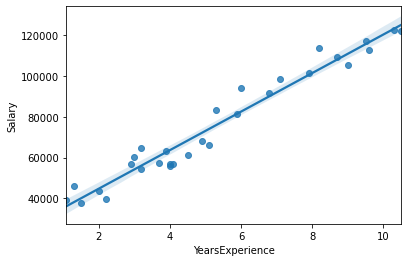

In [58]:
sns.regplot(x='YearsExperience',y='Salary',data=df_salary)

In [59]:
model_salary.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [61]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [62]:
#strong correlation between variables

In [63]:
model_salary.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [64]:
#as pvalue<<0.05, YearsExperiance can be used to predict salary

In [66]:
model_salary.rsquared

0.9569566641435086

In [67]:
#YearsExperiance data is suuficient to predict salary values

In [77]:
#predict new salary values for different YearsExperiance
df_pred=pd.DataFrame(pd.Series([12,15]),columns=['YearsExperience'])

In [78]:
model_salary.predict(df_pred)

0    139191.748056
1    167541.635020
dtype: float64